# Prediksi Harga Saham dengan Metode LSTM (Long short Term Memory)


In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta

plt.style.use('seaborn')

In [2]:
#usdtoidr=web.data.DataReader(konvert,data_source=data_api,start=mulai,end=akhir)
#usdtoidr
#variabel
kode_saham="MYOR.JK"
data_api="yahoo"
mulai=dt.datetime(2020,1,1)
if dt.datetime.today().weekday()==5 :
    akhir=dt.datetime.today()- timedelta(days=2)
    prediksi=dt.datetime.today()- timedelta(days=1)
elif dt.datetime.today().weekday()==6 :
    akhir=dt.datetime.today()- timedelta(days=3)
    prediksi=dt.datetime.today()- timedelta(days=2)
else:
    akhir=dt.datetime.today()- timedelta(days=1)
    prediksi=dt.datetime.today()
jumlah_train=0.8

 
#konvert='USDIDR%3DX'

In [3]:
#data saham
df=web.DataReader(kode_saham,data_source=data_api,start=mulai,end=akhir)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,2050.0,2000.0,2050.0,2030.0,1547000.0,1956.228027
2020-01-03,2040.0,2020.0,2030.0,2030.0,2578900.0,1956.228027
2020-01-06,2040.0,2000.0,2030.0,2020.0,1177400.0,1946.591553
2020-01-07,2040.0,2020.0,2020.0,2030.0,1406500.0,1956.228027
2020-01-08,2030.0,1985.0,2030.0,2000.0,2454400.0,1927.318359
...,...,...,...,...,...,...
2022-03-11,1655.0,1605.0,1610.0,1640.0,11162400.0,1640.000000
2022-03-14,1720.0,1640.0,1640.0,1690.0,10239000.0,1690.000000
2022-03-15,1700.0,1635.0,1690.0,1660.0,7345700.0,1660.000000


In [4]:
#df2=df[['High','Low','Open','Close','Adj Close']]*usdtoidr[['Adj Close']].reindex(df.index).values
#df2

In [5]:
#jumlah kolom dan baris
panjang_test=math.floor(len(df)*(1-jumlah_train))
panjang_test

107

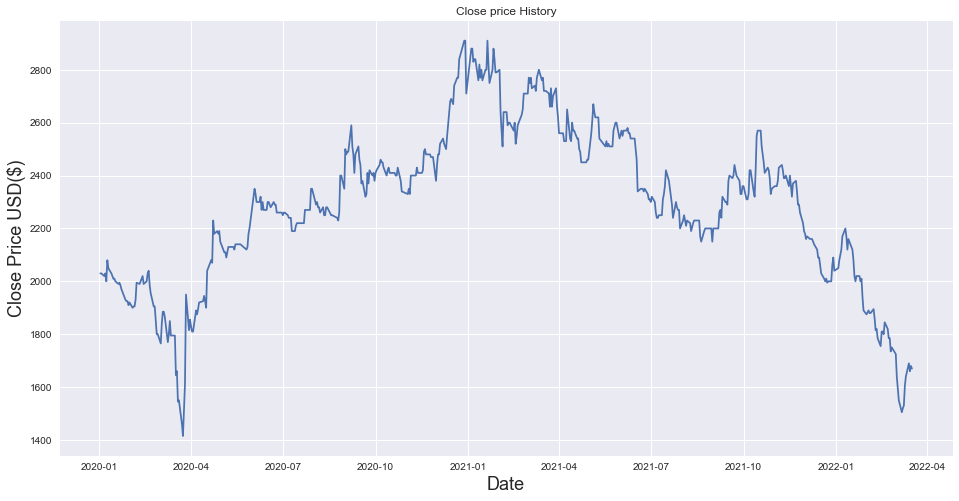

In [6]:
#visualisasi 
plt.figure(figsize=(16,8))
plt.title('Close price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [7]:
#create dataframe close colum
data=df.filter(['Close'])
dataset=data.values
training_data_len= math.ceil(len(dataset)*jumlah_train)
#training_data_len

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
#scaled_data

In [9]:
#create training data set
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(panjang_test,len(train_data)):
    x_train.append(train_data[i-panjang_test:i,0])
    y_train.append(train_data[i,0])
    #if i<=61:
        #print(x_train)
        #print(y_train)
        #print()

In [10]:
#convert x_train , y_train to np array
x_train,y_train = np.array(x_train),np.array(y_train)

In [11]:
#reshape data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(325, 107, 1)

In [12]:
#build LSTM
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
#compile 
model.compile(optimizer='adam',loss='mean_squared_error')


In [14]:
model.fit(x_train,y_train,batch_size=1, epochs=1)

325/325 [==============================] - 26s 61ms/step - loss: 0.0110


In [15]:
#create data testing
test_data=scaled_data[training_data_len-panjang_test :,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(panjang_test,len(test_data)):
    x_test.append(test_data[i-panjang_test:i,0])

In [16]:
#convert data to np array
x_test=np.array(x_test)

In [17]:
#reshape data
x_test=np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [18]:
#get the model predicted values
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


In [19]:
#get the root mean squared error (RMSE)
#standart deviasi
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

87.70136967411747

C:\Users\soero\AppData\Local\Temp/ipykernel_8892/1291773712.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


<function matplotlib.pyplot.show(close=None, block=None)>

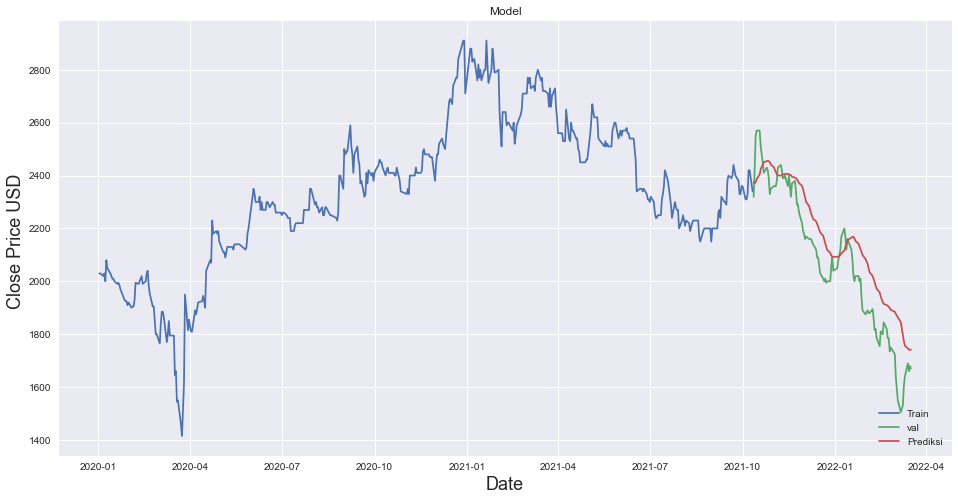

In [20]:
#plot the  data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','val','Prediksi'],loc='lower right')
plt.show


In [21]:
#show the valid and predictions
valid

,Close,Predictions
Date,,
2021-10-12,2320.0,2373.016602
2021-10-13,2420.0,2371.614502
2021-10-14,2550.0,2374.385254
2021-10-15,2570.0,2386.445557
2021-10-18,2570.0,2404.023682
...,...,...
2022-03-11,1640.0,1757.025879
2022-03-14,1690.0,1746.069458
2022-03-15,1660.0,1741.928955


In [22]:
#get the quote
apple_quote=web.DataReader(kode_saham,data_source=data_api,start=mulai,end=akhir)
#create a new dataframe
new_df=apple_quote.filter(['Close'])
#get the last day 60
last_60_days=new_df[-panjang_test:].values
#print(last_60_days)
#scaled data
last_60_days_scaled=scaler.transform(last_60_days)
X_test = []
#append teh pas 60 days
X_test.append(last_60_days_scaled)
#convert X-Test to np array
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#predicted price
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(f'Prediksi harga Saham {kode_saham} adalah {pred_price[0]}')

Prediksi harga Saham MYOR.JK adalah [1744.8041]


In [26]:
apple_quote2=web.DataReader(kode_saham,data_source=data_api,start=prediksi,end=prediksi)
#apple_quote2

In [27]:
#akurasi
gap_saham=(pred_price[0]-apple_quote2['Close'][0])
print(f'Akurasi Prediksi : {gap_saham}')

Akurasi Prediksi : [69.80408]
